In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score
path="C:/Users/KAVYA/Desktop/Demantia_project/21_dementiadiseasetypeprediction/dementia_dataset.csv"
df=pd.read_csv(path)
print(df.shape)
print(df.head())
print(df.info())
print(df.isna().sum())
df['Group'].unique()

df1=df.loc[df['Group']=='Converted']
df=df.drop(df1.index)
df1.head()

df1['Last_Visit']=df1.groupby('Subject ID')['Visit'].transform('max')
df1.loc[df1['Visit'] < df1['Last_Visit'],'Group']='Nondemented'
df1.loc[df1['Visit']==df1['Last_Visit'],'Group']='Demented'
df1.drop('Last_Visit',axis=1,inplace=True)
df1.head()

frames=[df,df1]
df=pd.concat(frames)
df['Group'].unique()

df.rename(columns={'M/F':'Gender'},inplace=True)
df.drop(columns=['Subject ID','Hand','Visit','MR Delay'],inplace=True)
print(df.isna().sum())

df.SES.fillna(df.SES.mode()[0],inplace=True)
df.MMSE.fillna(df.MMSE.mean(),inplace=True)
print(df.isna().sum())

#Creating a count plot with 'Group' on x-axis.
sns.countplot(data=df, x='Group', palette='Set2').set(title='Dementia Group');

#Visualizing the distribution of 'Group' by 'Gender' using a count plot.
sns.countplot(data=df, x='Group', palette='Set2', hue='Gender').set(title = 'Dementia Group by Gender');

# Visualizing the distribution of Education for each 'Gender' and 'Group'
sns.displot(data=df, x='EDUC', col='Gender', palette='Set2', hue='Group', kind='kde');

plt.figure(figsize=(8,6))
sns.countplot(df.EDUC, data=df)
plt.ylabel('Count')
plt.show()

# Visualizing the correlation matrix of numeric columns using a heatmap
corr_matrix=df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')


# Asf and Etiv have a strong negative correlation, eliminating one of the two variables to reduce noise in the data
df.drop(columns=['ASF'],inplace=True)
print(df.head())

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Group']=le.fit_transform(df['Group'])
df['MRI ID']=le.fit_transform(df['MRI ID'])
print(df.head())

inputs=df.drop(['Group'],axis=1)
output=df.Group
print(inputs)
print(output)

X_train,X_test,y_train,y_test=train_test_split(inputs,output,test_size=0.2,random_state=42)

# Visualizing the distribution of 'Age' for each 'Group'
sns.displot(data=df, x='Age', hue='Group', kind="kde", palette='Set2');

#Random Forest

model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print('Accuracy Score:',accuracy_score(y_test,y_pred))

#K-nearest neighbor

knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print('Accuracy Score:',accuracy_score(y_test,y_pred))

#Logistic Regression

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('Accuracy Score:',accuracy_score(y_test,y_pred))

#SVM

supv=SVC()
supv.fit(X_train,y_train)
y_pred=supv.predict(X_test)

print('Accuracy Score:',accuracy_score(y_test,y_pred))

#Naive Bayes

nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

print('Accuracy Score:',accuracy_score(y_test,y_pred))

#Decision Tree

dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print('Accuracy Score:',accuracy_score(y_test,y_pred))

MRI_ID=int(input("Enter the MRI ID:"))
Gender=int(input("Enter the Gender(0/1):"))
Age=int(input("Enter the Age:"))
EDUC=int(input("Enter the Education:"))
SES=float(input("Enter the value of SES:"))
MMSE=float(input("Enter the value of MMSE:"))
CDR=float(input("Enter the  value of CDR:"))
eTIV=int(input("Enter the value of eTIV:"))
nWBV=float(input("Enter the value of nWBV:"))

res=model.predict([[MRI_ID,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV]])
print(res)


ModuleNotFoundError: No module named 'numpy'

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=2,n_estimators=50,learning_state=0.1,subsample=0.8,colsample_bytree=0.8,colsample_bylevel=0.7)
model.fit

<bound method XGBClassifier.fit of XGBClassifier(base_score=None, booster=None, colsample_bylevel=0.7,
              colsample_bynode=None, colsample_bytree=0.8,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, learning_state=0.1, max_delta_step=None,
              max_depth=2, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=0.8, tree_method=None, validate_parameters=None,
              verbosity=None)>

C:\Users\KAVYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


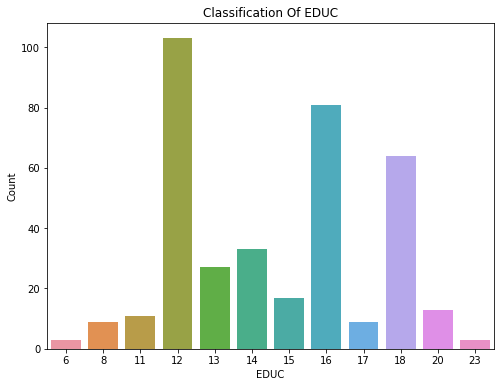

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df.EDUC, data=df)
plt.title("Classification Of EDUC")
plt.ylabel('Count')
plt.show()

C:\Users\KAVYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


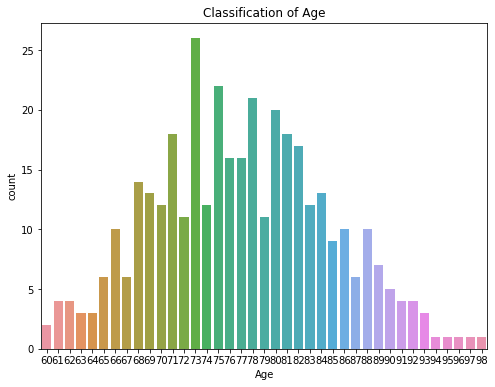

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df.Age, data=df)
plt.title("Classification of Age")
plt.show()

C:\Users\KAVYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


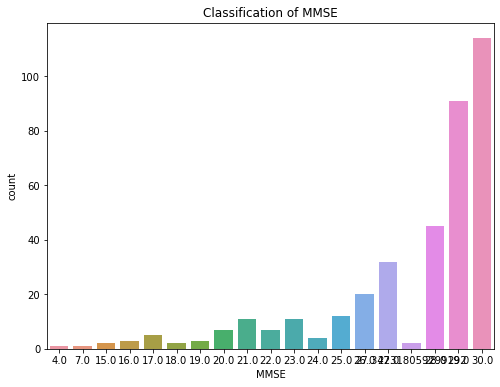

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df.MMSE, data=df)
plt.title("Classification of MMSE")
plt.show()

C:\Users\KAVYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


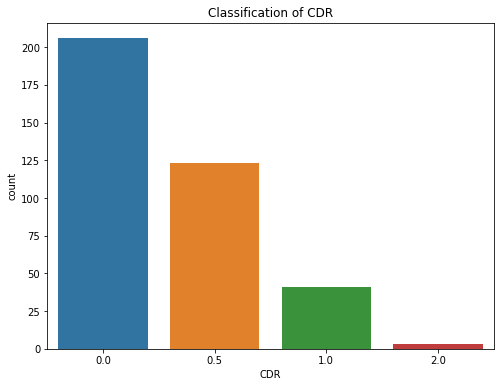

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df.CDR, data=df)
plt.title("Classification of CDR")
plt.show()